**Zadanie 6**

Przeprowadź swoje badania dynamiki ECA na podstawie oceny diagramów czasoprzestrzennych i spróbuj zreplikować klasyfikację Wolframa lub zaproponować swoją podobną.
Pomysły warte rozważania (ale możesz zaproponować też swój):
- Jak na zachowanie danego ECA wpływa zmiana stanu pojedynczej komórki w
warunku początkowym (czy wpływa czy nie wpływa i jak bardzo)?
- Występowanie symetrii, powtarzalnych elementów, wzorców?
- Zmiana częstości występowania 0 i 1 w konfiguracji.
- Zmiana częstości występowania bloków o zadanej długości np. 3 - czyli częstości występowania poszczególnych konfiguracji sąsiedztw.

# Klasyfikacja
1. Funkcja generująca diagram czasoprzestrzenny
  + Funkcja rysująca diagram czasoprzestrzenny
2. Badanie wpływu zmiany warunku początkowego na zachowanie ECA za pomocą różnych miar
3. Klasyfikacja za pomocą częstości występowania bloków 3-elementowych
4. Inne klasyfikacje

In [1]:
import random
import itertools
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from collections import Counter
from scipy.spatial import distance
from collections import defaultdict

## 1) eca_steps() i eca_visualize()

In [2]:
def eca_steps(rule_number: int, configuration: list[int], steps: int) -> list[list[int]]:
    rule_string = format(rule_number, '08b')
    rules = {format(i, '03b'): rule_string[::-1][i] for i in range(8)}

    configurations = []
    for _ in range(steps):
        extended_config = configuration[-1:] + configuration + configuration[:1]
        new_configuration = [int(rules[''.join(map(str, extended_config[i:i+3]))]) for i in range(len(configuration))]
        configurations.append(new_configuration)
        configuration = new_configuration

    return configurations


In [3]:
def eca_visualize(rule_number, configuration, steps):
    spacetime_field = eca_steps(rule_number, configuration, steps)

    binary_spacetime_field = [[1 if cell else 0 for cell in row] for row in spacetime_field]

    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_title(f'Space-time Diagram of the ECA {rule_number}', fontsize=15)
    ax.imshow(binary_spacetime_field, cmap='Greys')
    ax.set_xlabel('Cell Index', fontsize=10)
    ax.set_ylabel('Time Step', fontsize=10)
    plt.show()


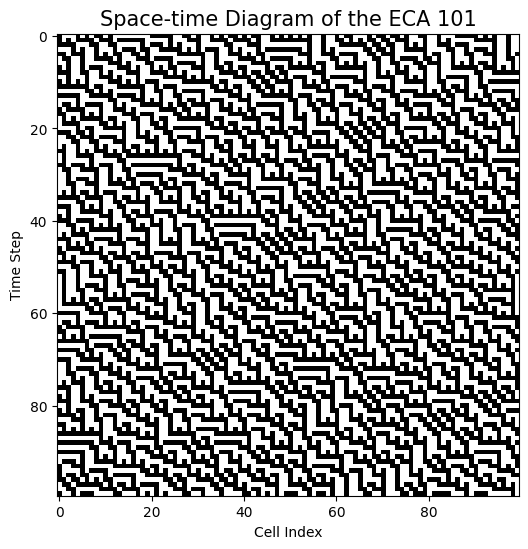

In [4]:
# przykład użycia
initial_conf = [random.randint(0,1) for _ in range(100)]
eca_visualize(101, initial_conf, 100)

## 2) Analiza czułości na zmianę warunku początkowego

Zmodyfikujemy starą funckję **analyze_diff()** na wzór funkcji **calculate_sensitivity()**:
- zmieniamy każdą komórkę po kolei dla jednej konfiguracji, a nie tylko pierwszą dla kilku różnych konfiguracji,
- prównujemy ostatnie konfiguracje, a nie całe diagramy,
- zwracamy kilka różnych metryk

In [49]:
# Stara funkcja
# def analyze_diff(rule_number, configuration, steps):
#     spacetime_field = eca_steps(rule_number, configuration, steps)
#     flipped_configuration = configuration.copy()
#     flipped_configuration[0] = 1 - flipped_configuration[0]
#     flipped_spacetime_field = eca_steps(rule_number, flipped_configuration, steps)
#     difference = np.sum(np.abs(np.array(spacetime_field) - np.array(flipped_spacetime_field)))
#     return difference

# Nowa funkcja
def analyze_diff(rule_number, configuration, steps):
    spacetime_field = eca_steps(rule_number, configuration, steps)[-1]
    differences = []
    for i in range(len(configuration)):
      new_configuration = configuration.copy()
      new_configuration[i] = 1 - new_configuration[i]
      new_spacetime_field = eca_steps(rule_number, new_configuration, steps)[-1]
      difference = np.sum(np.abs(np.array(spacetime_field) - np.array(new_spacetime_field)))
      differences.append(difference)
    differences = np.array(differences)/(len(configuration))

    # maksymalna różnica
    max_difference = np.max(differences)
    # średnia różnica
    mean_difference = np.mean(differences)
    # odchylenie standardowe różnicy
    std_difference = np.std(differences)
    # różnica względna
    relative_difference = max_difference / mean_difference if mean_difference != 0 else 0
    # entropia różnicy
    entropy_difference = -np.sum([p * np.log2(p) for p in differences if p > 0])
    # kombinacja metryk
    combined_difference = max_difference * mean_difference * std_difference * relative_difference * entropy_difference

    return max_difference, mean_difference, std_difference, relative_difference, entropy_difference, combined_difference


In [50]:
analyze_diff(101, initial_conf, 100)

(0.61,
 0.49790000000000006,
 0.053203289371992785,
 1.225145611568588,
 49.67339507275927,
 0.9833814193192778)

In [51]:
# wywołujemy funkcję analyze_diff() dla każdej reguły
d = pd.DataFrame(columns=['max_difference', 'mean_difference',
                          'std_difference', 'relative_difference',
                          'entropy_difference', 'combined_difference'])

for rule_number in range(256):
    print(f'ECA {rule_number}')
    difference = analyze_diff(rule_number, initial_conf, 100)
    d.loc[rule_number] = difference
d


ECA 0
ECA 1
ECA 2
ECA 3
ECA 4
ECA 5
ECA 6
ECA 7
ECA 8
ECA 9
ECA 10
ECA 11
ECA 12
ECA 13
ECA 14
ECA 15
ECA 16
ECA 17
ECA 18
ECA 19
ECA 20
ECA 21
ECA 22
ECA 23
ECA 24
ECA 25
ECA 26
ECA 27
ECA 28
ECA 29
ECA 30
ECA 31
ECA 32
ECA 33
ECA 34
ECA 35
ECA 36
ECA 37
ECA 38
ECA 39
ECA 40
ECA 41
ECA 42
ECA 43
ECA 44
ECA 45
ECA 46
ECA 47
ECA 48
ECA 49
ECA 50
ECA 51
ECA 52
ECA 53
ECA 54
ECA 55
ECA 56
ECA 57
ECA 58
ECA 59
ECA 60
ECA 61
ECA 62
ECA 63
ECA 64
ECA 65
ECA 66
ECA 67
ECA 68
ECA 69
ECA 70
ECA 71
ECA 72
ECA 73
ECA 74
ECA 75
ECA 76
ECA 77
ECA 78
ECA 79
ECA 80
ECA 81
ECA 82
ECA 83
ECA 84
ECA 85
ECA 86
ECA 87
ECA 88
ECA 89
ECA 90
ECA 91
ECA 92
ECA 93
ECA 94
ECA 95
ECA 96
ECA 97
ECA 98
ECA 99
ECA 100
ECA 101
ECA 102
ECA 103
ECA 104
ECA 105
ECA 106
ECA 107
ECA 108
ECA 109
ECA 110
ECA 111
ECA 112
ECA 113
ECA 114
ECA 115
ECA 116
ECA 117
ECA 118
ECA 119
ECA 120
ECA 121
ECA 122
ECA 123
ECA 124
ECA 125
ECA 126
ECA 127
ECA 128
ECA 129
ECA 130
ECA 131
ECA 132
ECA 133
ECA 134
ECA 135
ECA 136
ECA 137
ECA 13

,max_difference,mean_difference,std_difference,relative_difference,entropy_difference,combined_difference
0,0.00,0.0000,0.000000,0.000000,-0.000000,-0.000000
1,0.05,0.0156,0.016020,3.205128,7.884758,0.000316
2,0.02,0.0084,0.007446,2.380952,5.160839,0.000015
3,0.03,0.0138,0.008340,2.173913,8.035679,0.000060
4,0.02,0.0082,0.004771,2.439024,5.367962,0.000010
...,...,...,...,...,...,...
251,0.00,0.0000,0.000000,0.000000,-0.000000,-0.000000
252,0.00,0.0000,0.000000,0.000000,-0.000000,-0.000000
253,0.00,0.0000,0.000000,0.000000,-0.000000,-0.000000
254,0.00,0.0000,0.000000,0.000000,-0.000000,-0.000000


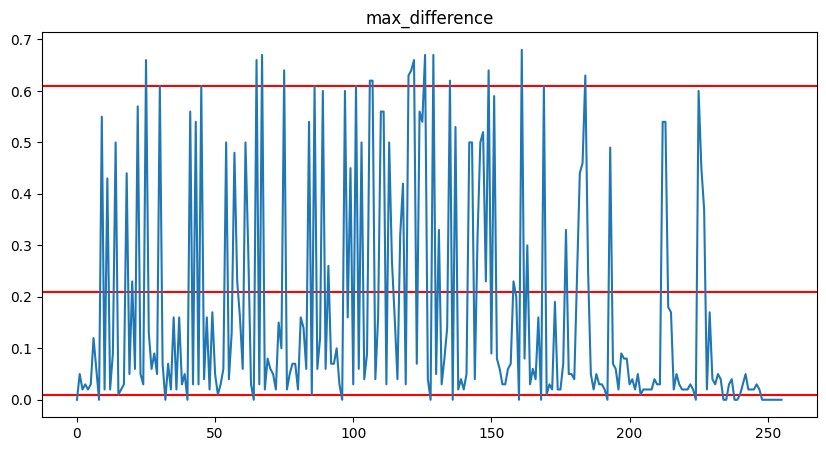

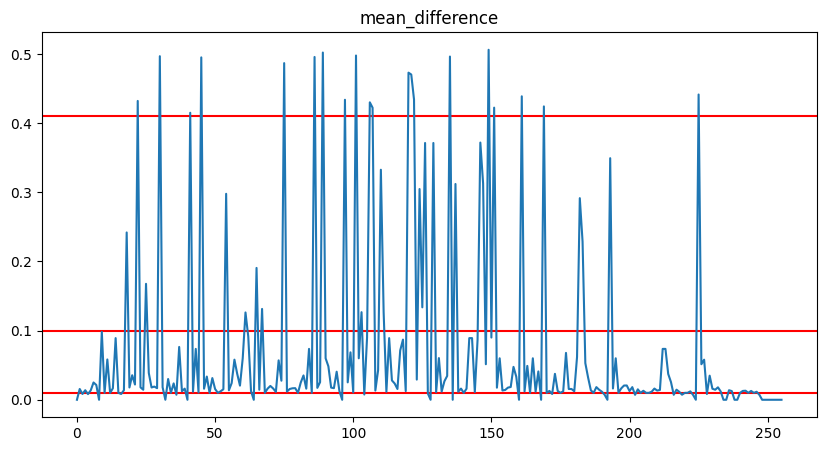

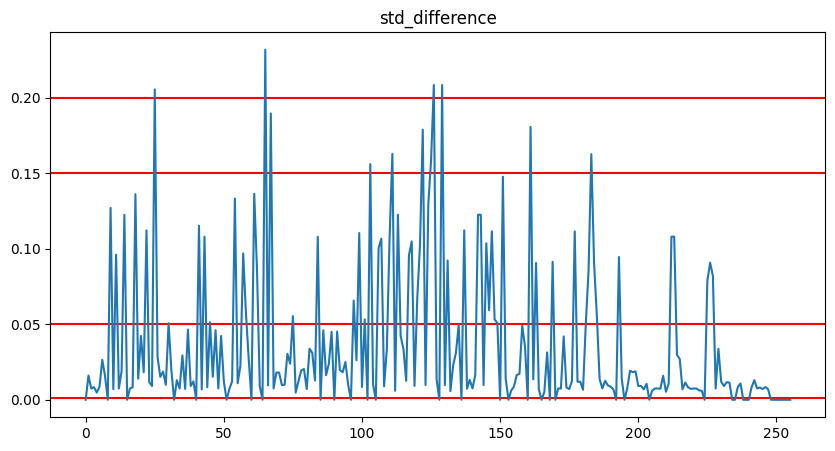

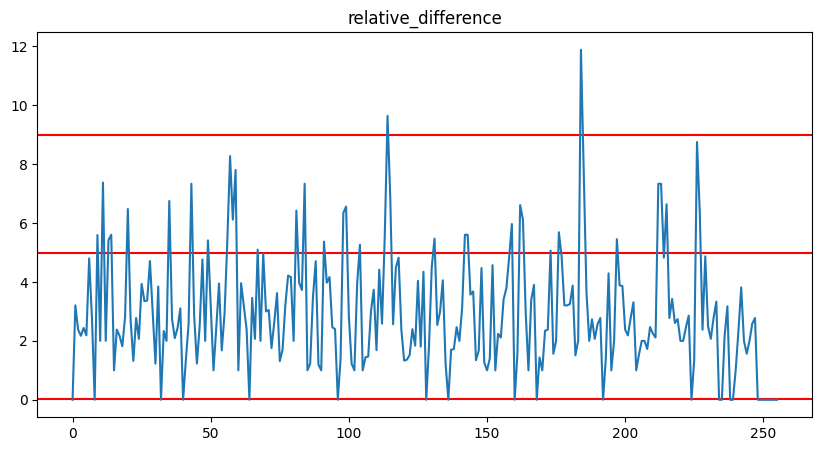

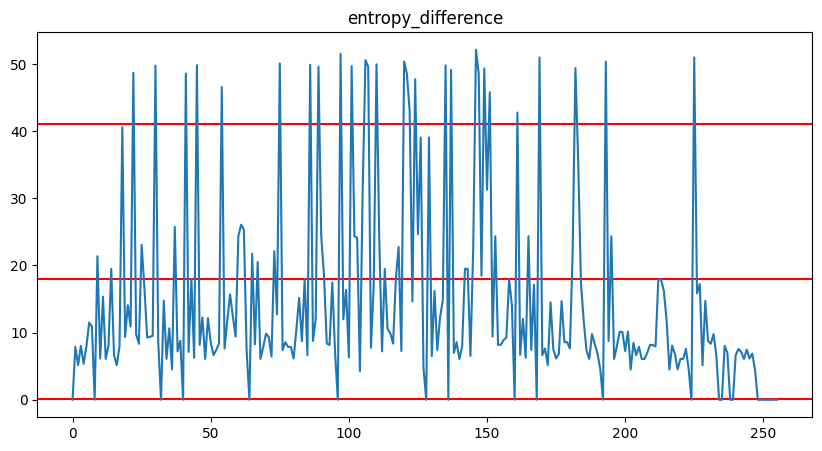

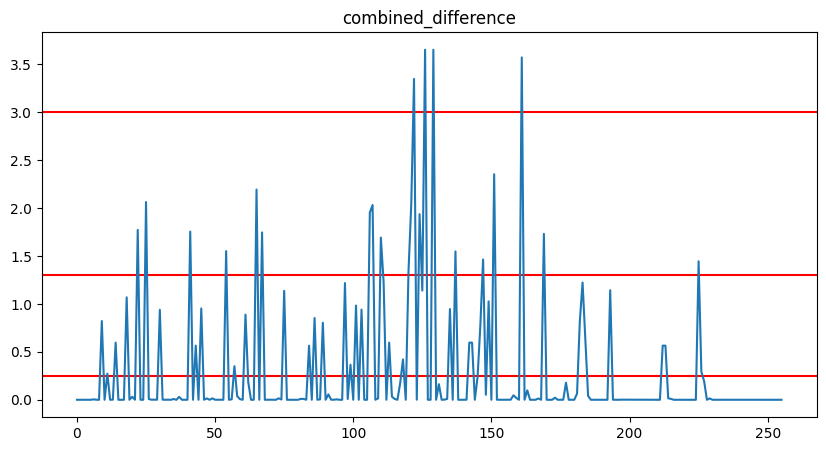

In [52]:
# wizualizacja
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(256), d['max_difference'])
ax.set_title('max_difference')
ax.axhline(0.01, xmin=0, xmax=1, color='red', zorder=0.5)
ax.axhline(0.21, xmin=0, xmax=1, color='red', zorder=0.5)
ax.axhline(0.61, xmin=0, xmax=1, color='red', zorder=0.5)
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(256), d['mean_difference'])
ax.set_title('mean_difference')
ax.axhline(0.01, xmin=0, xmax=1, color='red', zorder=0.5)
ax.axhline(0.1, xmin=0, xmax=1, color='red', zorder=0.5)
ax.axhline(0.41, xmin=0, xmax=1, color='red', zorder=0.5)
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(256), d['std_difference'])
ax.set_title('std_difference')
ax.axhline(0.001, xmin=0, xmax=1, color='red', zorder=0.5)
ax.axhline(0.05, xmin=0, xmax=1, color='red', zorder=0.5)
ax.axhline(0.15, xmin=0, xmax=1, color='red', zorder=0.5)
ax.axhline(0.2, xmin=0, xmax=1, color='red', zorder=0.5)
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(256), d['relative_difference'])
ax.set_title('relative_difference')
ax.axhline(0.01, xmin=0, xmax=1, color='red', zorder=0.5)
ax.axhline(5, xmin=0, xmax=1, color='red', zorder=0.5)
ax.axhline(9, xmin=0, xmax=1, color='red', zorder=0.5)
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(256), d['entropy_difference'])
ax.set_title('entropy_difference')
ax.axhline(0.1, xmin=0, xmax=1, color='red', zorder=0.5)
ax.axhline(18, xmin=0, xmax=1, color='red', zorder=0.5)
ax.axhline(41, xmin=0, xmax=1, color='red', zorder=0.5)
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(256), d['combined_difference'])
ax.set_title('combined_difference')
ax.axhline(0.25, xmin=0, xmax=1, color='red', zorder=0.5)
ax.axhline(1.3, xmin=0, xmax=1, color='red', zorder=0.5)
ax.axhline(3, xmin=0, xmax=1, color='red', zorder=0.5)
plt.show()


### Klasyfikacja za pomocą różnicy względnej

In [53]:
classes = [
 set([ r for r in range(256) if d['relative_difference'].loc[r] == 0]),
 set([ r for r in range(256) if d['relative_difference'].loc[r] < 5 and d['relative_difference'].loc[r] > 0]),
 set([ r for r in range(256) if d['relative_difference'].loc[r] < 9 and d['relative_difference'].loc[r] >= 5]),
 set([ r for r in range(256) if d['relative_difference'].loc[r] >= 9])
]

for c, rules in enumerate(classes):
    print(f" Klasa {c+1}: {sorted(rules)}")

 Klasa 1: [0, 8, 32, 40, 64, 96, 128, 136, 160, 168, 192, 224, 234, 235, 238, 239, 248, 249, 250, 251, 252, 253, 254, 255]
 Klasa 2: [1, 2, 3, 4, 5, 6, 7, 10, 12, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 60, 61, 62, 63, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 97, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 132, 133, 134, 135, 137, 138, 139, 140, 141, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 161, 164, 165, 166, 167, 169, 170, 171, 172, 174, 175, 177, 178, 179, 180, 181, 182, 183, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 214, 216, 217, 218, 219, 220, 221, 222, 223, 225, 228, 229, 230, 231, 232, 233, 236, 237, 240, 241, 242, 243,

Dla porównania, klasyfikacja Wolframa:

In [13]:
wolfram_classes = [
    set([0, 8, 32, 40, 64, 96, 128, 136, 160, 168, 192, 224, 234, 235, 238, 239, 248, 249, 250, 251, 252, 253, 254, 255]),
    set([1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 33, 34, 35, 36, 37, 38, 39, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 91, 92, 93, 94, 95, 98, 99, 100, 103, 104, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 123, 125, 127, 130, 131, 132, 133, 134, 138, 139, 140, 141, 142, 143, 144, 145, 148, 152, 154, 155, 156, 157, 158, 159, 162, 163, 164, 166, 167, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 184, 185, 186, 187, 188, 189, 190, 191, 194, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 226, 227, 228, 229, 230, 231, 232, 233, 236, 237, 240, 241, 242, 243, 245, 246, 247]),
    set([18, 22, 30, 45, 60, 75, 86, 89, 90, 101, 102, 105, 122, 126, 129, 135, 146, 149, 150, 151, 153, 161, 165, 182, 183, 195]),
    set([41, 54, 97, 106, 107, 110, 120, 121, 124, 137, 147, 169, 193, 225])
]

## 3) Klasyfikacja na podstawie analizy częstości występowania bloków długości 3

In [14]:
def analyze_block_occurrences(rule_number, configuration, steps, block_size):
    spacetime_field = eca_steps(rule_number, configuration, steps)

    all_possible_blocks = {tuple(map(int, format(i, '0{}b'.format(block_size)))): 0 for i in range(2**block_size)}

    for config in spacetime_field:
        for i in range(len(config) - block_size + 1):
            block = tuple(config[i:i+block_size])
            all_possible_blocks[block] += 1

    total_blocks = sum(all_possible_blocks.values())
    block_percentages = {block: round(count / total_blocks * 100, 2) for block, count in all_possible_blocks.items()}

    return block_percentages

In [15]:
analyze_block_occurrences(1, initial_conf, 100, 3)

{(0, 0, 0): 41.84,
 (0, 0, 1): 8.16,
 (0, 1, 0): 3.06,
 (0, 1, 1): 5.1,
 (1, 0, 0): 8.16,
 (1, 0, 1): 0.0,
 (1, 1, 0): 5.1,
 (1, 1, 1): 28.57}

In [16]:
l = []
for rule_number in range(256):
    block_occurrence_results = analyze_block_occurrences(rule_number, initial_conf, 100, 3)
    l.append(block_occurrence_results)
d2 = pd.DataFrame(l)
d2

,"(0, 0, 0)","(0, 0, 1)","(0, 1, 0)","(0, 1, 1)","(1, 0, 0)","(1, 0, 1)","(1, 1, 0)","(1, 1, 1)"
0,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,41.84,8.16,3.06,5.10,8.16,0.00,5.10,28.57
2,46.00,18.00,18.00,0.00,18.00,0.00,0.00,0.00
3,23.06,17.96,8.94,9.02,17.96,0.00,9.02,14.04
4,52.04,14.29,16.33,0.00,15.31,2.04,0.00,0.00
...,...,...,...,...,...,...,...,...
251,0.00,0.00,0.02,0.17,0.00,0.18,0.16,99.46
252,0.03,0.11,0.00,0.29,0.11,0.17,0.30,98.99
253,0.00,0.00,0.00,0.17,0.00,0.17,0.18,99.47
254,0.00,0.03,0.00,0.08,0.03,0.05,0.08,99.72


### Klasyfikacja za pomocą odchylenia standardowego częstości występowania bloków 3-elementowych

In [17]:
d2['std'] = [np.std(np.array(d2.loc[i])) for i in range(256)]
d2

,"(0, 0, 0)","(0, 0, 1)","(0, 1, 0)","(0, 1, 1)","(1, 0, 0)","(1, 0, 1)","(1, 1, 0)","(1, 1, 1)",std
0,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.071891
1,41.84,8.16,3.06,5.10,8.16,0.00,5.10,28.57,13.746069
2,46.00,18.00,18.00,0.00,18.00,0.00,0.00,0.00,15.157506
3,23.06,17.96,8.94,9.02,17.96,0.00,9.02,14.04,6.769904
4,52.04,14.29,16.33,0.00,15.31,2.04,0.00,0.00,16.459580
...,...,...,...,...,...,...,...,...,...
251,0.00,0.00,0.02,0.17,0.00,0.18,0.16,99.46,32.868353
252,0.03,0.11,0.00,0.29,0.11,0.17,0.30,98.99,32.690305
253,0.00,0.00,0.00,0.17,0.00,0.17,0.18,99.47,32.872141
254,0.00,0.03,0.00,0.08,0.03,0.05,0.08,99.72,32.966546


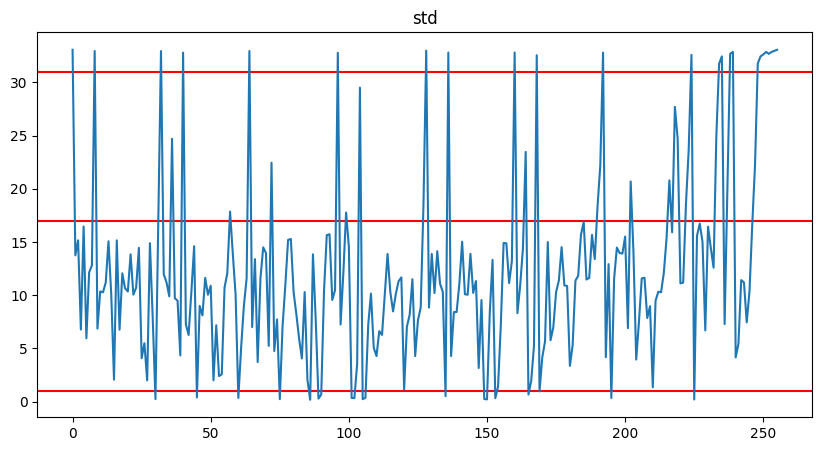

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(256), d2['std'])
ax.set_title('std')
ax.axhline(1, xmin=0, xmax=1, color='red', zorder=0.5)
ax.axhline(17, xmin=0, xmax=1, color='red', zorder=0.5)
ax.axhline(31, xmin=0, xmax=1, color='red', zorder=0.5)
plt.show()

In [19]:
classes2 = [
 set([ r for r in range(256) if d2['std'].loc[r] <= 1]),
 set([ r for r in range(256) if d2['std'].loc[r] <= 17 and d2['std'].loc[r] > 1]),
 set([ r for r in range(256) if d2['std'].loc[r] <= 31 and d2['std'].loc[r] > 17]),
 set([ r for r in range(256) if d2['std'].loc[r] >= 31])
]

for c, rules in enumerate(classes2):
    print(f" Klasa {c+1}: {sorted(rules)}")

 Klasa 1: [30, 45, 60, 75, 86, 89, 90, 101, 102, 105, 106, 135, 149, 150, 153, 165, 169, 195, 225]
 Klasa 2: [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 33, 34, 35, 37, 38, 39, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 91, 92, 93, 94, 95, 97, 98, 100, 103, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 129, 130, 131, 132, 133, 134, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 151, 152, 154, 155, 156, 157, 158, 159, 161, 162, 163, 166, 167, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 193, 194, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 217, 220, 221, 226, 227, 228, 229, 230, 231, 232, 236, 240, 241, 242, 243, 244, 245, 246]
 Klasa

Wyznaczona w ten sposób klasa 4 odpowiada klasie 1 z klasyfikacji Wolframa:

In [20]:
for c, rules in enumerate(wolfram_classes):
    print(f" Klasa {c+1}: {sorted(rules)}")

 Klasa 1: [0, 8, 32, 40, 64, 96, 128, 136, 160, 168, 192, 224, 234, 235, 238, 239, 248, 249, 250, 251, 252, 253, 254, 255]
 Klasa 2: [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 33, 34, 35, 36, 37, 38, 39, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 91, 92, 93, 94, 95, 98, 99, 100, 103, 104, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 123, 125, 127, 130, 131, 132, 133, 134, 138, 139, 140, 141, 142, 143, 144, 145, 148, 152, 154, 155, 156, 157, 158, 159, 162, 163, 164, 166, 167, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 184, 185, 186, 187, 188, 189, 190, 191, 194, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 226, 227, 228, 229, 230, 231, 232, 233, 236, 237, 240, 241, 242, 243, 245, 246, 2

### Klasyfikacja na podstawie dominującego bloku (8 klas)

In [21]:
dominant_block_classes = defaultdict(list)

for rule_number in range(256):
    block_occurrence_results = d2.drop(columns='std').loc[rule_number]
    dominant_block = block_occurrence_results.idxmax()
    dominant_block_classes[dominant_block].append(rule_number)

for block, rules in dominant_block_classes.items():
    print(f"Dominujący blok {block}: {sorted(rules)}")


Dominujący blok (0, 0, 0): [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 30, 32, 33, 36, 37, 38, 39, 40, 41, 44, 46, 52, 53, 54, 55, 60, 64, 65, 66, 67, 72, 74, 80, 88, 89, 90, 96, 97, 100, 101, 102, 104, 126, 128, 130, 132, 134, 136, 137, 144, 146, 148, 152, 160, 161, 164, 168, 172, 192, 193, 194, 200, 208, 224, 228, 232]
Dominujący blok (0, 1, 0): [5, 13, 26, 28, 29, 34, 48, 50, 56, 57, 68, 69, 76, 82, 98, 99, 109, 133, 135, 140, 141, 154, 156, 162, 163, 176, 177, 184, 196, 197, 210, 226]
Dominujący blok (0, 0, 1): [11, 14, 15, 35, 42, 43, 49, 81, 84, 85, 105, 112, 113, 131, 138, 139, 145, 170, 171, 180, 240, 241]
Dominujący blok (1, 1, 1): [27, 31, 61, 63, 83, 87, 91, 95, 103, 107, 110, 111, 119, 121, 122, 123, 124, 125, 127, 129, 147, 149, 151, 153, 155, 158, 159, 165, 169, 173, 174, 175, 182, 183, 188, 189, 190, 191, 195, 201, 202, 203, 209, 211, 214, 215, 216, 217, 218, 219, 222, 223, 225, 229, 230, 231, 233, 234, 235, 236, 237, 238, 239, 245, 246, 2

## 4) Inne klasyfikacje

### Klasyfikacja na podstawie tempa zmiany gęstości

In [27]:
def density_change_rate(rule_number, configuration, steps):
    spacetime_field = eca_steps(rule_number, configuration, steps)
    density_changes = [abs(sum(spacetime_field[i+1]) - sum(spacetime_field[i])) for i in range(len(spacetime_field) - 1)]
    return sum(density_changes) / len(density_changes)

density_change_rates = [density_change_rate(rule_number, initial_conf, 100) for rule_number in range(256)]


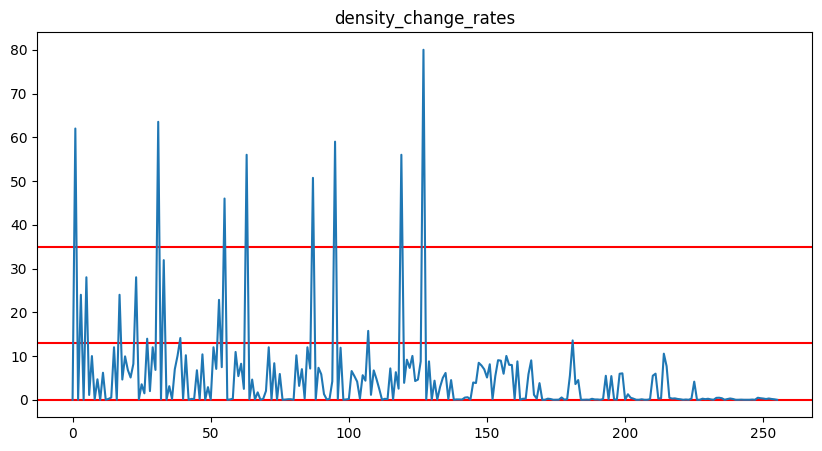

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(256), density_change_rates)
ax.set_title('density_change_rates')
ax.axhline(0, xmin=0, xmax=1, color='red', zorder=0.5)
ax.axhline(13, xmin=0, xmax=1, color='red', zorder=0.5)
ax.axhline(35, xmin=0, xmax=1, color='red', zorder=0.5)
plt.show()


In [33]:
density_classes = [
    set([r for r in range(256) if density_change_rates[r] == 0]),
    set([r for r in range(256) if density_change_rates[r] <= 13 and density_change_rates[r] > 0]),
    set([r for r in range(256) if density_change_rates[r] <= 35 and density_change_rates[r] > 13]),
    set([r for r in range(256) if density_change_rates[r] > 35])
]

for c, rules in enumerate(density_classes):
    print(f" Klasa {c+1}: {sorted(rules)}")


 Klasa 1: [0, 2, 4, 10, 12, 16, 34, 42, 48, 56, 68, 76, 80, 98, 112, 138, 170, 171, 174, 175, 184, 185, 187, 191, 200, 204, 205, 207, 208, 221, 223, 226, 227, 232, 236, 240, 241, 243, 244, 245, 247, 255]
 Klasa 2: [6, 7, 8, 9, 11, 13, 14, 15, 18, 19, 20, 21, 22, 24, 25, 26, 28, 29, 30, 32, 35, 36, 37, 38, 40, 41, 43, 44, 45, 46, 47, 49, 50, 51, 52, 54, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 172, 173, 176, 177, 178, 179, 180, 182, 183, 186, 188, 189, 190, 192, 193, 194, 195, 196, 197, 198, 199, 201, 202, 203, 206, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 2

Zdecydowanie różnią się od klas Wolframa.

### Klasyfikacja na podstawie odległości od konfiguracji początkowej do końcowej

In [34]:
def configuration_distance(rule_number, configuration, steps):
    spacetime_field = eca_steps(rule_number, configuration, steps)
    # obliczamy odległość Hamminga między dwoma wektorami 1-D
    return distance.hamming(configuration, spacetime_field[-1])

configuration_distances = [configuration_distance(rule_number, initial_conf, 100) for rule_number in range(256)]


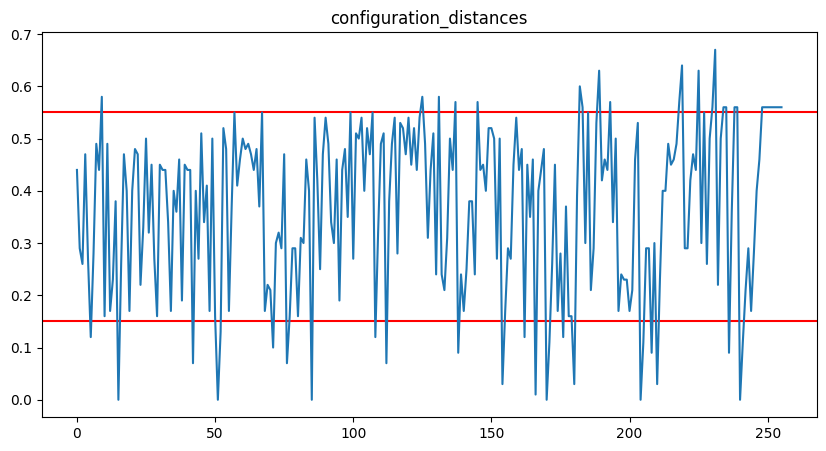

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(256), configuration_distances)
ax.set_title('configuration_distances')
ax.axhline(0.15, xmin=0, xmax=1, color='red', zorder=0.5)
ax.axhline(0.55, xmin=0, xmax=1, color='red', zorder=0.5)
plt.show()


Wykres wygląda tak, jakbyśmy mieli podzielić reguły na trzy klasy.

In [41]:
distance_classes = [
    set([r for r in range(256) if configuration_distances[r] <= 0.15]),
    set([r for r in range(256) if configuration_distances[r] <= 0.55 and configuration_distances[r] > 0.15]),
    set([r for r in range(256) if configuration_distances[r] > 0.55])
]

for c, rules in enumerate(distance_classes):
    print(f" Klasa {c+1}: {sorted(rules)}")


 Klasa 1: [5, 15, 42, 51, 52, 71, 76, 85, 108, 112, 138, 154, 162, 166, 170, 171, 176, 180, 204, 205, 208, 210, 236, 240, 241]
 Klasa 2: [0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 139, 140, 141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 167, 168, 169, 172, 173, 174, 175, 177, 178, 179, 181, 184, 185, 186, 187, 188, 190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 206, 207, 209, 211, 212, 213, 214, 215, 216, 217, 220, 221, 222, 223, 224, 2

### Klasyfikacja na podstawie występowania symetrii, powtarzalnych elementów, wzorców

In [48]:
def symmetry_measure(rule_number, configuration, steps):
    spacetime_field = eca_steps(rule_number, configuration, steps)
    return sum(1 for i in range(len(spacetime_field) // 2) if spacetime_field[i] == spacetime_field[-i-1]) / (len(spacetime_field) // 2)

symmetry_measures = [symmetry_measure(rule_number, initial_conf, 100) for rule_number in range(256)]


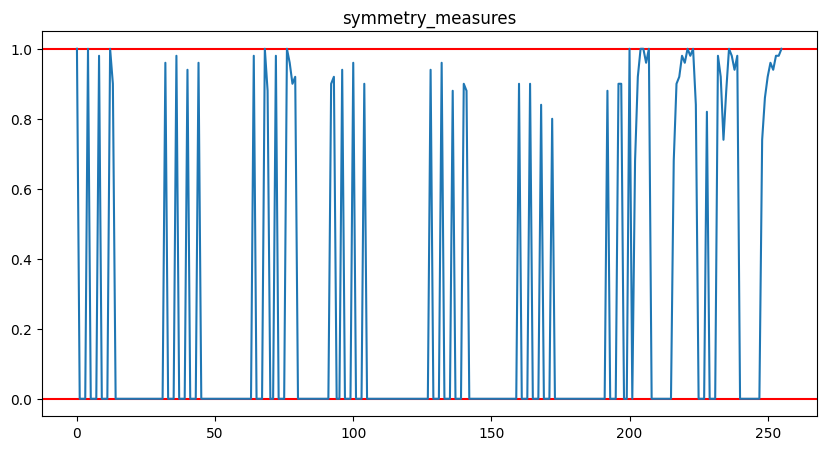

In [47]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(256), symmetry_measures)
ax.set_title('symmetry_measures')
ax.axhline(0, xmin=0, xmax=1, color='red', zorder=0.5)
ax.axhline(1, xmin=0, xmax=1, color='red', zorder=0.5)
plt.show()


Ten wykres również wskazuje na trzy klasy:
- równe 0,
- równe 1,
- pozostałe przypadki.

In [46]:
symmetry_classes = [
    set([r for r in range(256) if symmetry_measures[r] == 0]),
    set([r for r in range(256) if symmetry_measures[r] < 1 and symmetry_measures[r] > 0]),
    set([r for r in range(256) if symmetry_measures[r] == 1])
]

for c, rules in enumerate(symmetry_classes):
    print(f" Klasa {c+1}: {sorted(rules)}")


 Klasa 1: [1, 2, 3, 5, 6, 7, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 37, 38, 39, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 70, 71, 73, 74, 75, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 94, 95, 97, 98, 99, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 133, 134, 135, 137, 138, 139, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 165, 166, 167, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 198, 199, 201, 208, 209, 210, 211, 212, 213, 214, 215, 225, 226, 227, 229, 230, 231, 240, 241, 242, 243, 244, 245, 246, 247]
 Klasa 2: [8, 13, 32, 36, 40, 44, 64, 69, 72, 77, 78, 79, 92, 93, 96, 100, 104, 128, 132, 136, 140, 141, 160, 164, 168, 172, 192, 1

Dalej można by wziąć pod uwagę kilka z tych metryk jednocześnie, przyznawać punkty za osiągnięcie odpowiednich przedziałów i ustalić klasy do jakich należą reguły w zależności od skumulowanej liczby punktów.